# Perform sentimental analysis on Elon Musk's tweets
---

## Getting Data

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataframe
tweets = pd.read_csv("Elon_musk.csv", encoding_errors='ignore', index_col = 'Unnamed: 0')
tweets

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


Nearly 2000 tweets

In [3]:
# Renaming the column
tweets.rename(columns = {'Text':'tweet'}, inplace = True)
tweets

,tweet
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
# Printing each tweet to find patterns in the data
for i, t in tweets.head(50).itertuples():
    print(i, ") ", t)

1 )  @kunalb11 Im an alien
2 )  @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
3 )  @joerogan @Spotify Great interview!
4 )  @gtera27 Doge is underestimated
5 )  @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
6 )  Happy New Year of the Ox! https://t.co/9WFKMYu2oj
7 )  Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM
8 )  @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
9 )  @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
10 )  The most entertaining outcome is the most likely
11 )  @GiveDirectly Just sent some
12 )  Just agree to do Clubhouse with @kanyewest
13 )  https://t.co/3rWE9uHSTS
14 )  @geoffkeighley @UnrealEngine Its getting real
15 )  Bought some Dogecoin for lil X, so he can be a toddler hodler
16 )  @JoshManMode He definitely has issues, but the sentencing seems a bit high
17 )  @freewalletorg Th

We can see elements like mentions, links, multilines, encoding errors, unicode representation of emojis, etc that need to be handled

## Pre-processing Data

In [5]:
# Turning multi-line tweets into a single line
tweets['tweet'] = tweets.tweet.str.replace("\n", ' ', regex= False)
tweets['tweet'] = tweets.tweet.apply(lambda x : x.strip())

In [6]:
# Removing all hyperlinks
tweets['tweet'] = tweets.tweet.str.replace(r"http\S+", '', regex= True)
tweets['tweet'] = tweets.tweet.apply(lambda x : x.strip())

In [7]:
# Replacing &amp; with and, &gt; with >, and &lt; with <
tweets['tweet'] = tweets.tweet.str.replace(r"&amp;", 'and', regex=False)
tweets['tweet'] = tweets.tweet.str.replace(r"&gt;", '>', regex=False)
tweets['tweet'] = tweets.tweet.str.replace(r"&lt;", '<', regex=False)
tweets['tweet'] = tweets.tweet.apply(lambda x : x.strip())

In [8]:
# Removing usernames
tweets['tweet'] = tweets.tweet.str.replace(r"@\w+", '', regex= True)
tweets['tweet'] = tweets.tweet.apply(lambda x : x.strip())

In [9]:
# Removing 'RT : ' which is a prefix for retweets
tweets['tweet'] = tweets.tweet.str.replace("RT : ", '', regex=False)

In [10]:
# Removing '#'
tweets['tweet'] = tweets.tweet.str.replace("#", '', regex=False)

In [11]:
# Getting tweets with text representations of emojis
i = 1
for t in tweets[tweets.tweet.str.contains(r"<.*>")].tweet:
    print(i,") ", t)
    i+=1

1 )  <U+0001F923><U+0001F923>
2 )  <U+0001F923><U+0001F923>
3 )  So cute <U+0001F495>
4 )  <U+0001F3B6> Who let the Doge out <U+0001F3B6>
5 )  <U+0001F923><U+0001F923>
6 )  <U+0001F923><U+0001F923>
7 )  <U+0001F5A4>
8 )  Watch Falcon 9 launch 60 Starlink satellites <U+2192>
9 )  <U+043C><U+044B> <U+0441><U+0434><U+0435><U+043B><U+0430><U+0435><U+043C>
10 )  Announcing the first commercial astronaut mission to orbit Earth aboard Dragon <U+2192>
11 )  Launch Alert <U+0001F680>  and  are targeting no earlier than April 20 for the launch of the second crew rotation mis
12 )  Read the whole article <U+0001F923><U+0001F923>
13 )  <U+0001F440>
14 )  <U+0001F923><U+0001F923>
15 )  <U+0001F917>
16 )  The esthetics of Cyberpunk are incredible btw. The interior design is<U+0001F44C>.
17 )  <U+0001F923><U+0001F923>
18 )  <U+0001F4AF>
19 )  Absolutely! They rock. <U+0001F5A4>
20 )  Hey you  Yeah you Queen  Youre gonna make it! <U+0001F495><U+0001F495>
21 )  Mus protec <U+0001F476> yoda
22 )  <U+041

In [12]:
# Extracting text representations of emojis and creating a dataframe of it with count of each emoji
emoji = tweets.tweet.str.extractall(r"(<U\+.*?>)")
emoji_count = emoji[0].value_counts().to_frame(name = 'emoji_count').reset_index(names = 'emoji_str')
emoji_count

,emoji_str,emoji_count
0,<U+0001F923>,77
1,<U+FE0F>,18
2,<U+0001F525>,16
3,<U+0001F5A4>,10
4,<U+0001F495>,7
...,...,...
87,<U+0001F634>,1
88,<U+0001F447>,1
89,<U+0001F6F0>,1
90,<U+0001F353>,1


In [13]:
# Creating a new column with code point notation
emoji_count["code_point"] = emoji_count.emoji_str.apply(lambda x : x[3:-1])
emoji_count

,emoji_str,emoji_count,code_point
0,<U+0001F923>,77,0001F923
1,<U+FE0F>,18,FE0F
2,<U+0001F525>,16,0001F525
3,<U+0001F5A4>,10,0001F5A4
4,<U+0001F495>,7,0001F495
...,...,...,...
87,<U+0001F634>,1,0001F634
88,<U+0001F447>,1,0001F447
89,<U+0001F6F0>,1,0001F6F0
90,<U+0001F353>,1,0001F353


The U+ notation is called the "Unicode code point notation" and the \ notation is called the "Unicode escape sequence notation". The escape sequence notation is generally used by programming languages. Thus, we will convert it to the required format

In [14]:
# Function to convert a code point to an emoji
def code_point_to_char(code_point):
    return chr(int(code_point, 16))

# apply the function to the column
emoji_count['emoji'] = emoji_count.code_point.apply(code_point_to_char)
emoji_count

,emoji_str,emoji_count,code_point,emoji
0,<U+0001F923>,77,0001F923,🤣
1,<U+FE0F>,18,FE0F,️
2,<U+0001F525>,16,0001F525,🔥
3,<U+0001F5A4>,10,0001F5A4,🖤
4,<U+0001F495>,7,0001F495,💕
...,...,...,...,...
87,<U+0001F634>,1,0001F634,😴
88,<U+0001F447>,1,0001F447,👇
89,<U+0001F6F0>,1,0001F6F0,🛰
90,<U+0001F353>,1,0001F353,🍓


We can see that some emojis are not generated or blank

In [15]:
# Printing every code point and emoji
for i in emoji_count[['code_point', 'emoji']].values:
    print(i)

['0001F923' '🤣']
['FE0F' '️']
['0001F525' '🔥']
['0001F5A4' '🖤']
['0001F495' '💕']
['2192' '→']
['0001F3B6' '🎶']
['043E' 'о']
['043B' 'л']
['0435' 'е']
['0001F440' '👀']
['0001F600' '😀']
['0001F609' '😉']
['0001F44D' '👍']
['2660' '♠']
['0001F4AF' '💯']
['0001F680' '🚀']
['26A1' '⚡']
['0001F1E9' '🇩']
['0001F1EA' '🇪']
['0001F44C' '👌']
['0432' 'в']
['2665' '♥']
['0001F4AB' '💫']
['0001F339' '🌹']
['0001F622' '😢']
['263A' '☺']
['200D' '\u200d']
['0001F62C' '😬']
['0001F603' '😃']
['0001F409' '🐉']
['0001F1E8' '🇨']
['0001F9DB' '🧛']
['0001F4B0' '💰']
['0001F918' '🤘']
['0001F4A9' '💩']
['0001F1E6' '🇦']
['0001F4A8' '💨']
['2640' '♀']
['0001F54A' '🕊']
['043C' 'м']
['044B' 'ы']
['0440' 'р']
['041A' 'К']
['0001F917' '🤗']
['0001F3A9' '🎩']
['043D' 'н']
['0001F40D' '🐍']
['0001F3B7' '🎷']
['2705' '✅']
['0001F3AF' '🎯']
['0001F43B' '🐻']
['0001F62E' '😮']
['0001F608' '😈']
['0001F9D9' '🧙']
['0001F1F8' '🇸']
['2642' '♂']
['0001F1FA' '🇺']
['0001F30E' '🌎']
['0001FA82' '🪂']
['0001F1F4' '🇴']
['044C' 'ь']
['0001F1E7' '🇧']
['00

- 'FE0F' is Variation Selector-16 (VS16) and does not have a symbol
- '200D' is Zero Width Joiner (ZWJ) and does not have a symbol

In [16]:
# Renaming values for the above symbol-less emojis to empty string
emoji_count.loc[emoji_count[emoji_count.code_point.isin(['FE0F', '200D'])].index, 'emoji'] = ""

In [17]:
# Getting a descriptor for each emoji using emoji package

import emoji
emoji_count['description'] = emoji_count.emoji.apply(lambda x: emoji.demojize(x))

In [18]:
# Printing every code point, emoji, and description
for i in emoji_count[['code_point', 'emoji', 'description']].values:
    print(i)

['0001F923' '🤣' ':rolling_on_the_floor_laughing:']
['FE0F' '' '']
['0001F525' '🔥' ':fire:']
['0001F5A4' '🖤' ':black_heart:']
['0001F495' '💕' ':two_hearts:']
['2192' '→' '→']
['0001F3B6' '🎶' ':musical_notes:']
['043E' 'о' 'о']
['043B' 'л' 'л']
['0435' 'е' 'е']
['0001F440' '👀' ':eyes:']
['0001F600' '😀' ':grinning_face:']
['0001F609' '😉' ':winking_face:']
['0001F44D' '👍' ':thumbs_up:']
['2660' '♠' ':spade_suit:']
['0001F4AF' '💯' ':hundred_points:']
['0001F680' '🚀' ':rocket:']
['26A1' '⚡' ':high_voltage:']
['0001F1E9' '🇩' '🇩']
['0001F1EA' '🇪' '🇪']
['0001F44C' '👌' ':OK_hand:']
['0432' 'в' 'в']
['2665' '♥' ':heart_suit:']
['0001F4AB' '💫' ':dizzy:']
['0001F339' '🌹' ':rose:']
['0001F622' '😢' ':crying_face:']
['263A' '☺' ':smiling_face:']
['200D' '' '']
['0001F62C' '😬' ':grimacing_face:']
['0001F603' '😃' ':grinning_face_with_big_eyes:']
['0001F409' '🐉' ':dragon:']
['0001F1E8' '🇨' '🇨']
['0001F9DB' '🧛' ':vampire:']
['0001F4B0' '💰' ':money_bag:']
['0001F918' '🤘' ':sign_of_the_horns:']
['0001F4A9' 

We can now add emojis or their descriptions instead of the unicode characters

In [19]:
import re

# Function to replace unicode for emojis with emojis
def replace_unicode_with_emoji(txt):
    em_lst = re.findall(r"(<U\+.+?>)", txt)
    for em in em_lst:
        cp = em[3:-1]
        if emoji_count[emoji_count.code_point == cp].shape[0] != 0:
            desc = emoji_count[emoji_count.code_point == cp].emoji.values[0].strip(":").replace("_", " ")
            txt = txt.replace(em, desc)
    return txt

# Function to replace unicode for emojis with their descriptions
def replace_unicode_with_description(txt):
    em_lst = re.findall(r"(<U\+.+?>)", txt)
    for em in em_lst:
        cp = em[3:-1]
        if emoji_count[emoji_count.code_point == cp].shape[0] != 0:
            desc = emoji_count[emoji_count.code_point == cp].description.values[0].strip(":").replace("_", " ")
            txt = txt.replace(em, " "+desc+" ")
    return txt

In [20]:
# Creating extra columns with unicode replaced with emojis and their description in tweets
tweets['tweet_with_emojis'] = tweets.tweet.apply(replace_unicode_with_emoji)
tweets['tweet_with_emoji_descriptions'] = tweets.tweet.apply(replace_unicode_with_description)

In [21]:
# Deleting empty tweets
tweets.drop(index = tweets[tweets.tweet == ''].index, inplace = True)

In [22]:
# Resetting index as we have dropped empty tweets
tweets.reset_index(drop=True, inplace=True)

In [23]:
# Seperating original tweets, tweets with emojis, and tweets with descriptions of emojis into separate dataframes to apply sentiment analysis on each
tweet = tweets[['tweet']]
tweet_with_emojis = tweets[['tweet_with_emojis']]
tweet_with_emoji_descriptions = tweets[['tweet_with_emoji_descriptions']]

## Sentiment Analysis

### VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis tool that is specifically designed to handle social media texts. It is known for its accuracy in detecting sentiment in short texts like tweets.

In [24]:
# importing necessary libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

In [25]:
# Function to return polarity scores
def sentiment_analyzer(text):
    return vader.polarity_scores(text)

In [26]:
# Function to classify tweet based on polarity score
def tweet_sentiment_clf(score):
    if score == 0:
        return 'Neutral'
    elif score > 0:
        return 'Positive'
    else:
        return 'Negative'

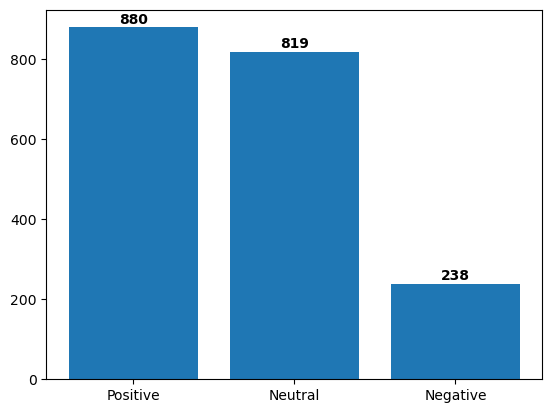

In [27]:
# Creating a dataframe of polarity scores for each original tweet
tweet_sentiment = pd.DataFrame(tweet.tweet.apply(sentiment_analyzer).values.tolist(), index = tweet.index)
# Adding polarity scores to original tweet df
tweet = pd.concat([tweet, tweet_sentiment], axis = 1)
# Classifying sentiment for the tweet based on polarity scores
tweet['sentiment'] = tweet.compound.apply(tweet_sentiment_clf)
# Barplot of tweets by sentiment
x = tweet.sentiment.value_counts().index.tolist()
y = tweet.sentiment.value_counts().values.tolist()
plt.bar(x, y)
for i, v in enumerate(y):
    plt.text(i, v + 10, str(v), color='black', fontweight='bold', ha='center')

Most tweets are positive or neutral. Very few negative tweets

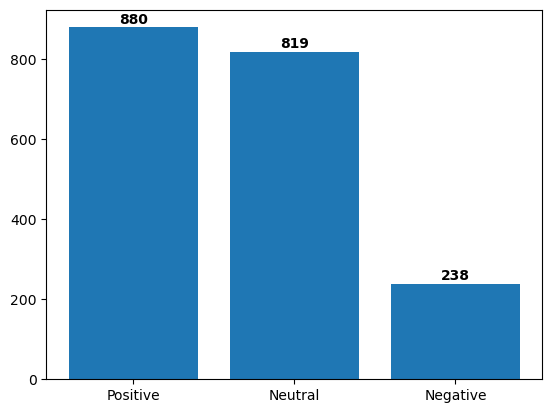

In [28]:
# Creating a dataframe of polarity scores for each tweet with emojis
tweet_with_emojis_sentiment = pd.DataFrame(tweet_with_emojis.tweet_with_emojis.apply(sentiment_analyzer).values.tolist(), index = tweet_with_emojis.index)
# Adding polarity scores
tweet_with_emojis = pd.concat([tweet_with_emojis, tweet_with_emojis_sentiment], axis = 1)
# Classifying sentiment for the tweet based on polarity scores
tweet_with_emojis['sentiment'] = tweet_with_emojis.compound.apply(tweet_sentiment_clf)
# Barplot of tweets by sentiment
x = tweet_with_emojis.sentiment.value_counts().index.tolist()
y = tweet_with_emojis.sentiment.value_counts().values.tolist()
plt.bar(x, y)
for i, v in enumerate(y):
    plt.text(i, v + 10, str(v), color='black', fontweight='bold', ha='center')

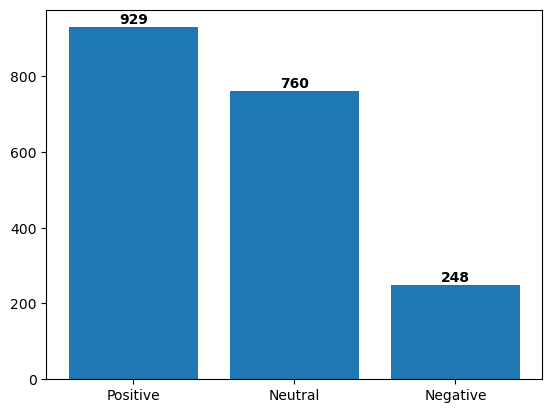

In [29]:
# Creating a dataframe of polarity scores for each tweet with description of emojis
tweet_with_emoji_descriptions_sentiment = pd.DataFrame(tweet_with_emoji_descriptions.tweet_with_emoji_descriptions.apply(sentiment_analyzer).values.tolist(), index = tweet_with_emoji_descriptions.index)
# Adding polarity scores to original tweet df
tweet_with_emoji_descriptions = pd.concat([tweet_with_emoji_descriptions, tweet_with_emoji_descriptions_sentiment], axis = 1)
# Classifying sentiment for the tweet based on polarity scores
tweet_with_emoji_descriptions['sentiment'] = tweet_with_emoji_descriptions.compound.apply(tweet_sentiment_clf)
# Barplot of tweets by sentiment
x = tweet_with_emoji_descriptions.sentiment.value_counts().index.tolist()
y = tweet_with_emoji_descriptions.sentiment.value_counts().values.tolist()
plt.bar(x, y)
for i, v in enumerate(y):
    plt.text(i, v + 10, str(v), color='black', fontweight='bold', ha='center')

Including descriptions of the emojis has lead to change in sentiment for some tweets. Tweets previously considered neutral are now classified as positive or negative based on words in the description

In [30]:
tweet[tweet.sentiment != tweet_with_emojis.sentiment]

,tweet,neg,neu,pos,compound,sentiment


Tweets with unicode for emoji and tweets with emojis give the same sentiment.

In [31]:
# Getting index of tweets that have their sentiment changed due to existance of description of the emoji
diff = tweet_with_emojis[tweet_with_emojis.sentiment != tweet_with_emoji_descriptions.sentiment].index
# Showing sentiment based on tweet with emoji, the tweet, and sentiment based on description of the emoji
df1 = tweet_with_emojis.loc[diff, ['sentiment', 'tweet_with_emojis']]
df1.rename(index = {'sentiment':'sentiment_with_emojis', 'tweet_with_emojis': 'tweet'})
df2 = tweet_with_emoji_descriptions.loc[diff, 'sentiment']
df2.rename(index = {'sentiment':'sentiment_with_description'})
pd.concat([df1, df2], axis = 1).values.tolist()

[['Neutral', '🤣🤣', 'Positive'],
 ['Neutral', '🤣🤣', 'Positive'],
 ['Neutral', '🤣🤣', 'Positive'],
 ['Neutral', '🤣🤣', 'Positive'],
 ['Neutral', 'Read the whole article 🤣🤣', 'Positive'],
 ['Neutral', '🤣🤣', 'Positive'],
 ['Neutral', '🤗', 'Positive'],
 ['Neutral',
  'The esthetics of Cyberpunk are incredible btw. The interior design is👌.',
  'Positive'],
 ['Neutral', '🤣🤣', 'Positive'],
 ['Neutral', '🤣🤣', 'Positive'],
 ['Neutral', '🤣🤣', 'Positive'],
 ['Neutral', '😢', 'Negative'],
 ['Neutral',
  'Its one 🔥 or 1/2 🔥 if you dont have a car with pedestrian speaker. We couldnt get everything done in',
  'Negative'],
 ['Neutral', 'The writing on Cobra Kai is sick👌', 'Positive'],
 ['Neutral', '🤣🤣', 'Positive'],
 ['Neutral', '🤣', 'Positive'],
 ['Negative', 'And no toilet paper 🤣🤣', 'Positive'],
 ['Neutral', '🤣🤣', 'Positive'],
 ['Negative', '. is savage 🤣🤣', 'Positive'],
 ['Positive', 'Tesla holiday software release is 🔥🔥', 'Negative'],
 ['Neutral', '👻 💵', 'Negative'],
 ['Neutral', 'Cold symptoms are 

Description are factored into sentiment analysis. Sometimes, this leads to misclassification as seen with the emoji for fire

### TextBlob

Another python library for sentiment analysis

In [32]:
from textblob import TextBlob

In [33]:
# Adding polarity column to every tweet df
tweet['polarity'] = tweet.tweet.apply(lambda x : TextBlob(x).polarity)
tweet_with_emojis['polarity'] = tweet_with_emojis.tweet_with_emojis.apply(lambda x : TextBlob(x).polarity)
tweet_with_emoji_descriptions['polarity'] = tweet_with_emoji_descriptions.tweet_with_emoji_descriptions.apply(lambda x : TextBlob(x).polarity)

# Adding subjectivity column to every tweet df
tweet['subjectivity'] = tweet.tweet.apply(lambda x : TextBlob(x).subjectivity)
tweet_with_emojis['subjectivity'] = tweet_with_emojis.tweet_with_emojis.apply(lambda x : TextBlob(x).subjectivity)
tweet_with_emoji_descriptions['subjectivity'] = tweet_with_emoji_descriptions.tweet_with_emoji_descriptions.apply(lambda x : TextBlob(x).subjectivity)

<Axes: xlabel='subjectivity', ylabel='polarity'>

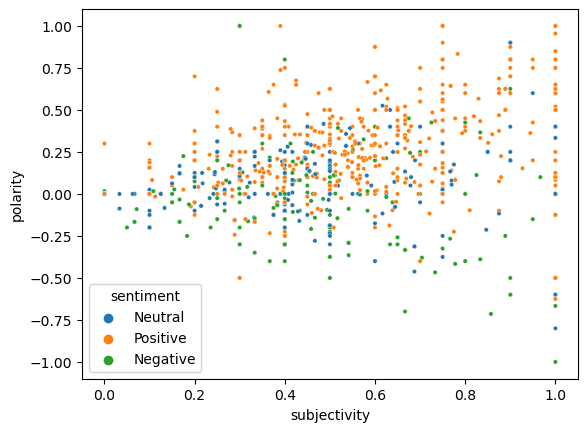

In [34]:
# Scatterplot of tweets with subjectivity on x axis and polarity on y axis, with color representing sentiment classification by VADER
sns.scatterplot(tweet, x = 'subjectivity', y = 'polarity', hue = 'sentiment', s = 10)

<Axes: xlabel='subjectivity', ylabel='polarity'>

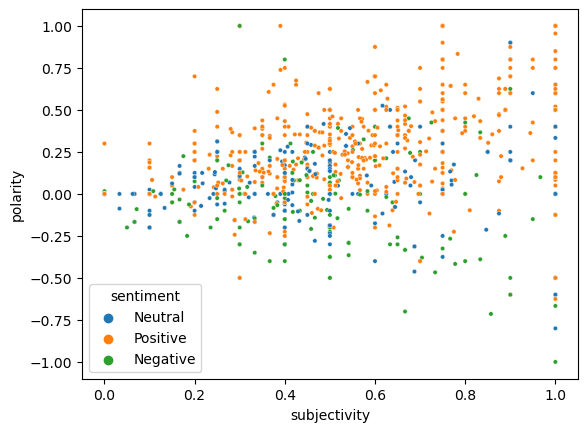

In [35]:
# Scatterplot of tweets with subjectivity on x axis and polarity on y axis, with color representing sentiment classification by VADER
sns.scatterplot(tweet_with_emojis, x = 'subjectivity', y = 'polarity', hue = 'sentiment', s = 10)

<Axes: xlabel='subjectivity', ylabel='polarity'>

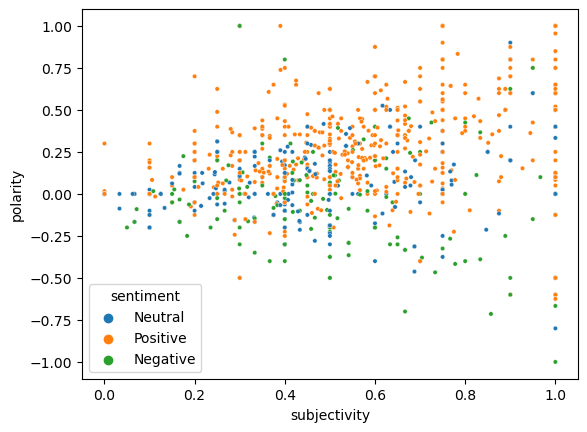

In [36]:
# Scatterplot of tweets with subjectivity on x axis and polarity on y axis, with color representing sentiment classification by VADER
sns.scatterplot(tweet_with_emoji_descriptions, x = 'subjectivity', y = 'polarity', hue = 'sentiment', s = 10)

VADER performs better than TextBlob